# 模型效应的可视化

#### 黄荣贵（复旦大学社会学系）

可以使用effects程序包对polr等多种统计模型的效应进行呈现。

首先，调用MASS程序包的polr函数拟合模型。

In [7]:
library(foreign)
library(MASS)
library(effects)

warm <- read.dta("datasets/ordwarm2.dta")

In [3]:
m <- polr(warm~yr89+male+white+age+ed+prst,data=warm)

summary(m)


Re-fitting to get Hessian



Call:
polr(formula = warm ~ yr89 + male + white + age + ed + prst, 
    data = warm)

Coefficients:
               Value Std. Error t value
yr891989    0.523912   0.079899   6.557
maleMen    -0.733309   0.078483  -9.344
whiteWhite -0.391140   0.118381  -3.304
age        -0.021666   0.002469  -8.777
ed          0.067176   0.015975   4.205
prst        0.006072   0.003293   1.844

Intercepts:
       Value    Std. Error t value 
1SD|2D  -2.4654   0.2389   -10.3188
2D|3A   -0.6309   0.2333    -2.7042
3A|4SA   1.2618   0.2340     5.3919

Residual Deviance: 5689.825 
AIC: 5707.825 

第二步，调用effects程序包的Effect函数建构特定项的效应（这里计算age变量的效应）。

In [9]:
eff_age = Effect("age", m)


Re-fitting to get Hessian



调用plot函数对效应进行可视化。

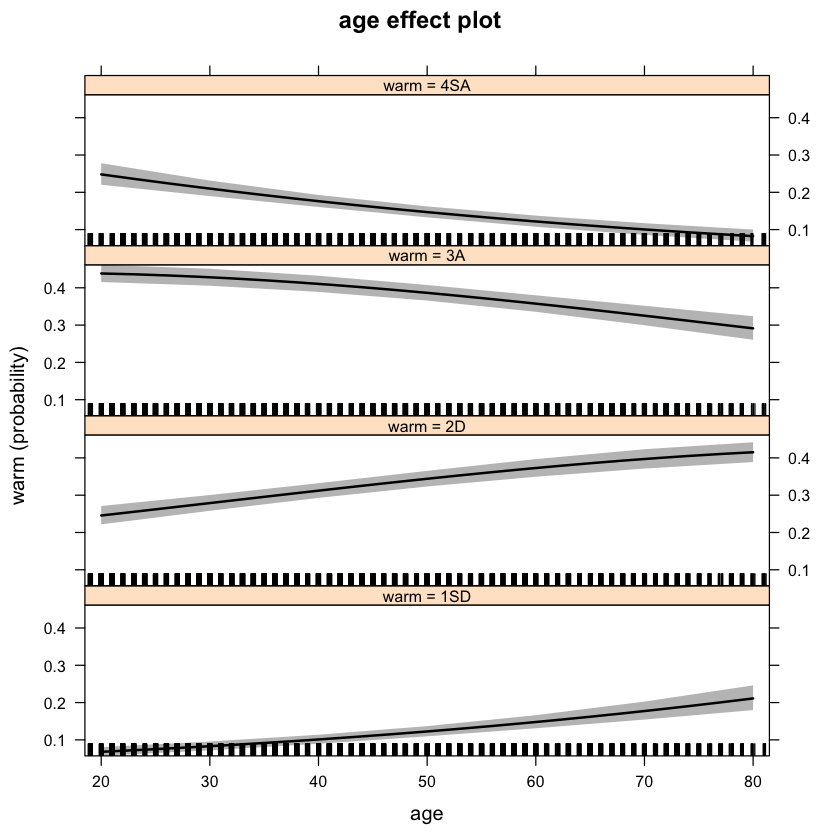

In [8]:
plot(eff_age)

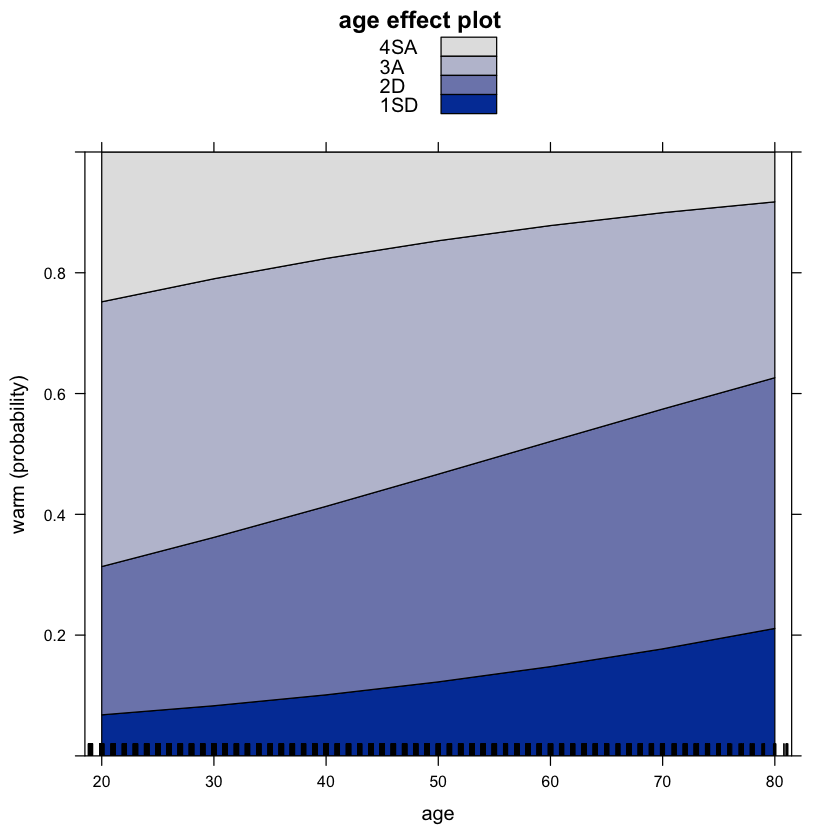

In [16]:
plot(eff_age, style="stacked")
# 以面积表示，而不是以线条表示


Re-fitting to get Hessian



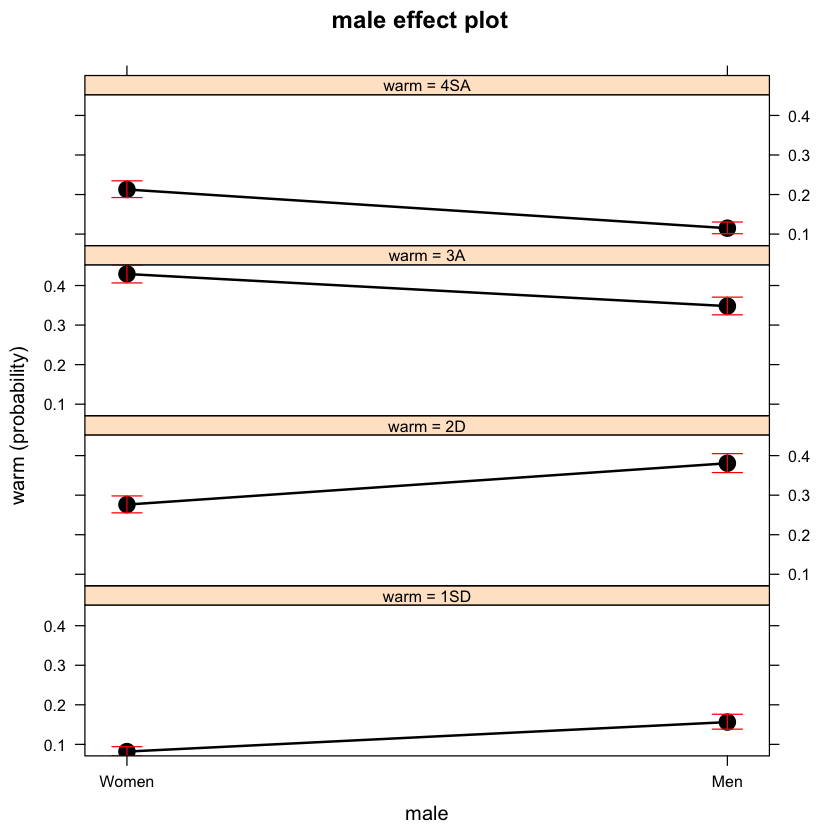

In [14]:
plot(Effect("male", m))

### 一次计算所有系数的效应，对不同效应逐步可视化

In [4]:
m2 <- polr(warm~yr89+age+male*ed+white+prst,data=warm)
summary(m2)


Re-fitting to get Hessian



Call:
polr(formula = warm ~ yr89 + age + male * ed + white + prst, 
    data = warm)

Coefficients:
              Value Std. Error t value
yr891989    0.52387   0.079929  6.5542
age        -0.02125   0.002478 -8.5771
maleMen    -0.15052   0.317612 -0.4739
ed          0.09763   0.022689  4.3032
whiteWhite -0.39088   0.118419 -3.3008
prst        0.00526   0.003320  1.5842
maleMen:ed -0.04753   0.025118 -1.8924

Intercepts:
       Value   Std. Error t value
1SD|2D -2.1079  0.3043    -6.9269
2D|3A  -0.2761  0.2993    -0.9225
3A|4SA  1.6218  0.3019     5.3722

Residual Deviance: 5686.24 
AIC: 5706.24 

In [13]:
effs = allEffects(m2)


Re-fitting to get Hessian


Re-fitting to get Hessian


Re-fitting to get Hessian


Re-fitting to get Hessian


Re-fitting to get Hessian



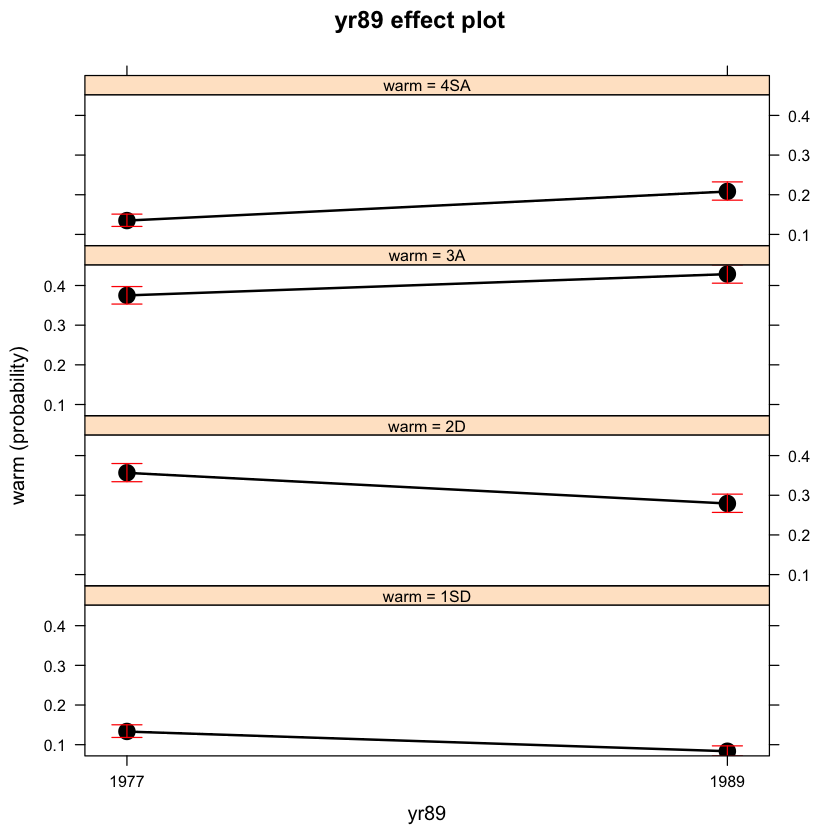

In [23]:
plot(effs[1])

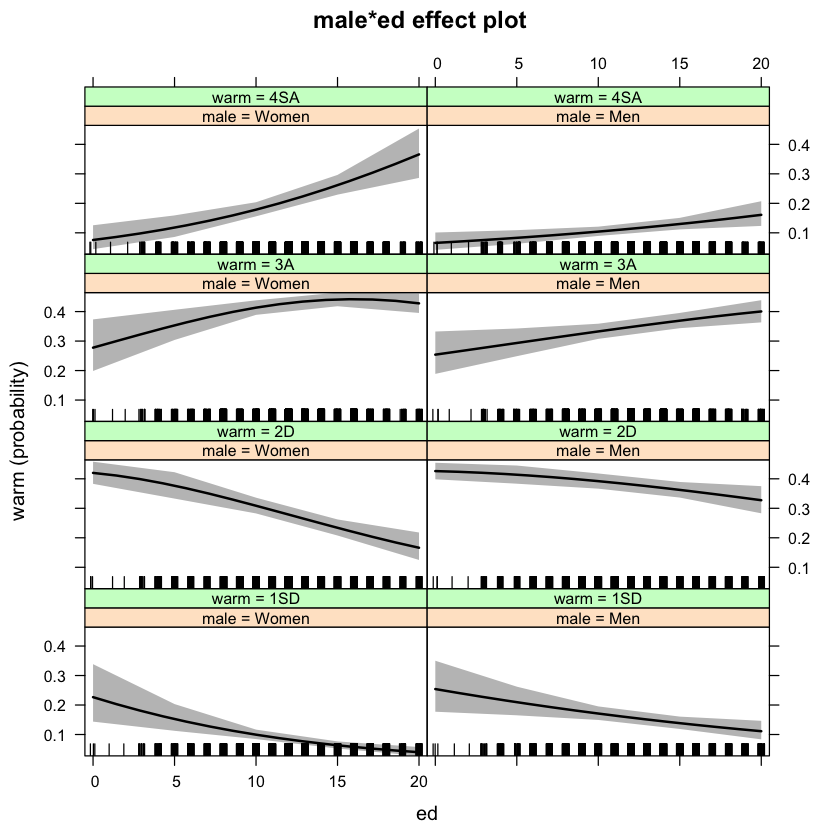

In [24]:
plot(effs[5])

### 对交互效应进行可视化

对交互效应进行可视化有两种方式：
* 调用allEffects函数计算所有项的效应，然后通过索引操作提取交互项对应的效应，并对其进行可视化（详见上一小节）；
* 调用effect函数（不是Effect函数）直接对交互项进行可视化（见下面的命令）。


Re-fitting to get Hessian



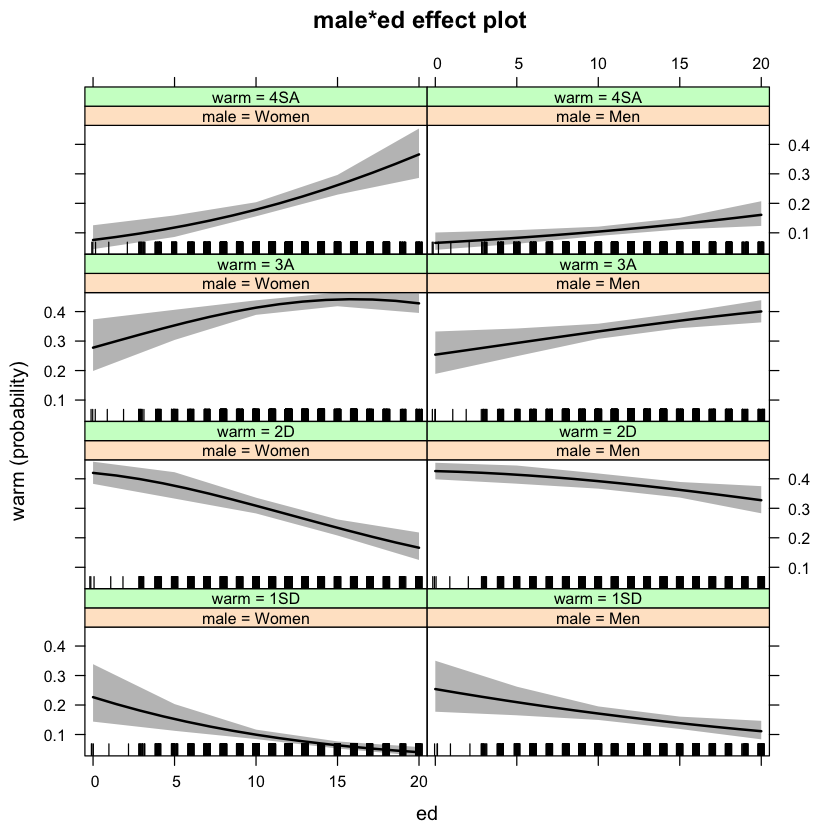

In [37]:
plot(effect("male*ed", m2))